In [1]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import preprocess_input
import numpy as np
from PIL import Image

In [2]:
model = load_model('threeemotions.h5')

### Model Evaluation

In [3]:
validation_data = 'Data/Automated Test'

# Init the Image Data Generator
validation_data_gen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

# Train Images
validation_generator = validation_data_gen.flow_from_directory(
        validation_data,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
)

Found 3979 images belonging to 3 classes.


In [4]:
result = model.evaluate(validation_generator)

125/125 [==============================] - 295s 2s/step - loss: 0.7719 - accuracy: 0.7879


### Manual Inference

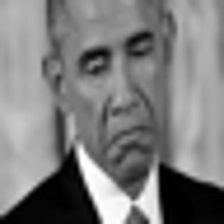

In [7]:
img_path = 'Data/Manual Test/Sad/2.jpg'

img = Image.open(img_path).convert('LA')
img = img.resize((48, 48))
img = img.resize((224, 224))
img = img.convert('RGB')
img

In [8]:
# Convert to array, preprocess and make a prediction
# Angry = 0, Happy = 1, Sad = 2
img = np.array(img)
img = np.expand_dims(img, axis=0)

img = preprocess_input(img)
img = img/255

prediction = model.predict(img)

np.argmax(prediction, axis=1)

1/1 [==============================] - 0s 232ms/step


array([2], dtype=int64)